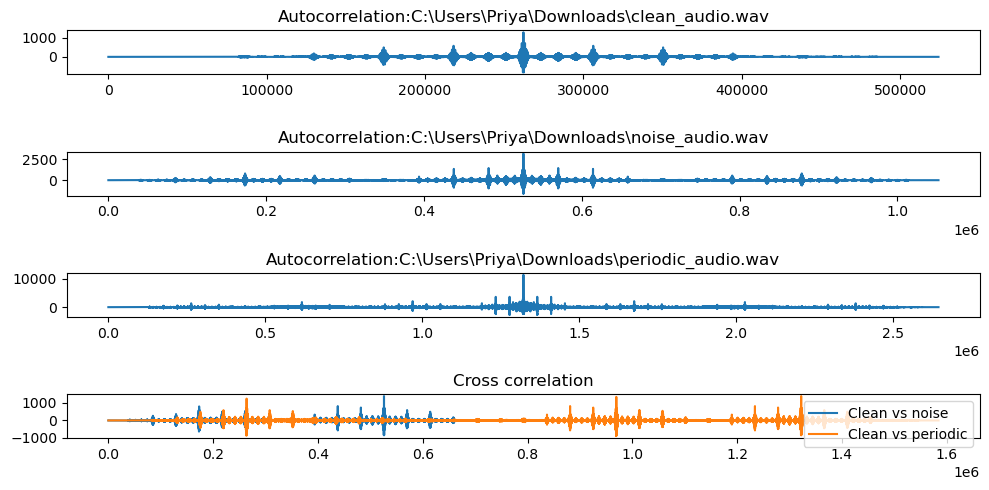

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import correlate

files = [
    r"C:\Users\Priya\Downloads\clean_audio.wav",
    r"C:\Users\Priya\Downloads\noise_audio.wav",
    r"C:\Users\Priya\Downloads\periodic_audio.wav",
]
audios = [sf.read(f)[0] for f in files]

for i in range(len(audios)):
    if audios[i].ndim > 1:
        audios[i] = audios[i][:,0]
        
autocorr = [correlate(a, a, mode = 'full')for a in audios]  
cross_corr_clean_noisy = correlate(audios[0],audios[1],mode='full')
cross_corr_clean_periodic = correlate(audios[0],audios[2],mode='full')

plt.figure(figsize=(10, 5))
for i, ac in enumerate(autocorr):
      plt.subplot(4, 1, i+1)
      plt.plot(ac)
      plt.title(f'Autocorrelation:{files[i]}')
      
plt.subplot(4, 1, 4)
plt.plot(cross_corr_clean_noisy,label ='Clean vs noise')
plt.plot(cross_corr_clean_periodic,label ='Clean vs periodic')
plt.title('Cross correlation') 
plt.legend()

plt.tight_layout()
plt.show()     


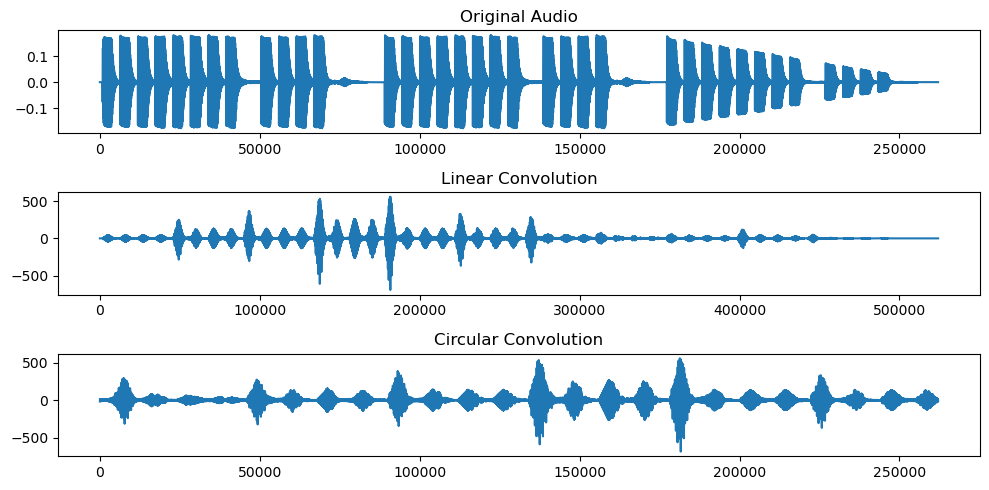

In [4]:
#Use Python to create a script that performs both linear and circular convolution on an audio file with an impulse response. Compare and visualize the results
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import convolve, fftconvolve

audio, sr = sf.read(r'C:\Users\Priya\Downloads\file_example_WAV.wav')
impulse, _ = sf.read(r'C:\Users\Priya\Downloads\file_example_WAV.wav')

if audio.ndim > 1:
    audio = audio[:, 0]
if impulse.ndim > 1:
    impulse = impulse[:, 0]

linear_conv = convolve(audio,impulse,mode='full')

N = len(audio)
M = len(impulse)
circular_len = N
impulse_padded = np.pad(impulse,(0,N-M), 'constant')
circular_conv = np.fft.ifft(np.fft.fft(audio)*np.fft.fft(impulse_padded)).real

sf.write('Linear_conv.wav',linear_conv, sr)
sf.write('Circular_conv.wav',circular_conv, sr)

plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.plot(audio)
plt.title('Original Audio')
plt.subplot(3, 1, 2)
plt.plot(linear_conv)
plt.title('Linear Convolution')
plt.subplot(3, 1, 3)
plt.plot(circular_conv)
plt.title('Circular Convolution')
plt.tight_layout()
plt.show()

        


In [1]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.
